In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

In [9]:
def log_progress(message):
    """This function logs the mentioned message of a given stage of the
    code execution to a log file. Function returns nothing"""
    with open('CODE1.txt', 'a') as f:
        f.write(f'{datetime.now()}: {message}\n')
    

## Extract from Pakwheels to hit API 5 PAGES OF USED CARS

In [35]:
import requests
from bs4 import BeautifulSoup
import json
import csv

all_cars = []

# Loop through pages 1 to 5
for page in range(1, 6):
    url = f"https://www.pakwheels.com/used-cars/search/-/?page={page}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    }

    print(f"Fetching Page {page}...")
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all JSON-LD scripts
    scripts = soup.find_all("script", type="application/ld+json")

    for script in scripts:
        try:
            data = json.loads(script.string)
            # Make sure it is a Product listing
            if isinstance(data, dict) and data.get("@type") == ["Product"]:
                title = data.get("name")
                model = data.get("manufacturer")
                year = data.get("modelDate")
                price = data.get("offers", {}).get("price")
                # Extract city from title or description
                city = None
                if title and " in " in title:
                    city = title.split(" in ")[-1]

                car = {
                    "title": title,
                    "model": model,
                    "year": year,
                    "price": price,
                    "city": city
                }
                all_cars.append(car)
        except Exception as e:
            # Skip any malformed JSON
            continue

# Save raw JSON for backup
with open("pakwheels_used_cars_raw.json", "w", encoding="utf-8") as f:
    json.dump(all_cars, f, ensure_ascii=False, indent=4)

# Save clean CSV
csv_columns = ["title", "model", "year", "price", "city"]
with open("pakwheels_used_cars.csv", "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
    writer.writeheader()
    for car in all_cars:
        writer.writerow(car)

print(f"\nScraping completed! Total cars fetched: {len(all_cars)}")


Fetching Page 1...
Fetching Page 2...
Fetching Page 3...
Fetching Page 4...
Fetching Page 5...

Scraping completed! Total cars fetched: 181


In [36]:
import pandas as pd

df = pd.read_csv("pakwheels_used_cars.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df)


                                                 title       model  year  \
0                Toyota Prius 2013 for sale in Karachi      Toyota  2013   
1            Suzuki Mehran 2015 for sale in Rawalpindi      Suzuki  2015   
2                 Toyota Hilux 2021 for sale in Multan      Toyota  2021   
3                 KIA Sorento 2022 for sale in Karachi         KIA  2022   
4                  Honda Civic 2008 for sale in Lahore       Honda  2008   
5                  Honda City 2019 for sale in Karachi       Honda  2019   
6                 Toyota Raize 2020 for sale in Lahore      Toyota  2020   
7                  Haval H6 2023 for sale in Islamabad       Haval  2023   
8                   Honda City 2010 for sale in Multan       Honda  2010   
9            Hyundai Santa Fe 2024 for sale in Karachi     Hyundai  2024   
10             Toyota Fortuner 2021 for sale in Lahore      Toyota  2021   
11              Toyota Corolla 2012 for sale in Lahore      Toyota  2012   
12          

## Load to csv

In [37]:
import pandas as pd

# Load CSV
df = pd.read_csv("pakwheels_used_cars.csv")

# Display as table in console
from tabulate import tabulate
print(tabulate(df, headers='keys', tablefmt='grid'))


+-----+---------------------------------------------------+------------+--------+----------+-------------+
|     | title                                             | model      |   year |    price | city        |
+=====+===================================================+============+========+==========+=============+
|   0 | Toyota Prius 2013 for sale in Karachi             | Toyota     |   2013 |  3900000 | Karachi     |
+-----+---------------------------------------------------+------------+--------+----------+-------------+
|   1 | Suzuki Mehran 2015 for sale in Rawalpindi         | Suzuki     |   2015 |  1290000 | Rawalpindi  |
+-----+---------------------------------------------------+------------+--------+----------+-------------+
|   2 | Toyota Hilux 2021 for sale in Multan              | Toyota     |   2021 | 11900000 | Multan      |
+-----+---------------------------------------------------+------------+--------+----------+-------------+
|   3 | KIA Sorento 2022 for sale in 

## data analysis using pandas numpy and matplotlib

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("pakwheels_used_cars.csv")

# ---------------- CLEANING ------------------

# Drop empty title rows
df = df.dropna(subset=["title"])

# Extract brand from title
df["brand"] = df["title"].str.split().str[0]

# Clean price
df["price"] = (
    df["price"].astype(str)
        .str.replace(",", "")
        .str.extract(r"(\d+)")
        .astype(float)
)

# Remove mileage column if exists
if "mileage" in df.columns:
    df = df.drop(columns=["mileage"])

# Clean engine size
if "engine_cc" in df.columns:
    df["engine_cc"] = (
        df["engine_cc"]
            .astype(str)
            .str.extract(r"(\d+)")
            .astype(float)
    )

# Clean year
df["year"] = (
    df["year"].astype(str)
        .str.extract(r"(\d{4})")
        .astype(float)
)

# Clean city
df["city"] = df["city"].astype(str).str.strip().str.title()

df.head()


,title,model,year,price,city,brand
0,Toyota Prius 2013 for sale in Karachi,Toyota,2013.0,3900000.0,Karachi,Toyota
1,Suzuki Mehran 2015 for sale in Rawalpindi,Suzuki,2015.0,1290000.0,Rawalpindi,Suzuki
2,Toyota Hilux 2021 for sale in Multan,Toyota,2021.0,11900000.0,Multan,Toyota
3,KIA Sorento 2022 for sale in Karachi,KIA,2022.0,8700000.0,Karachi,KIA
4,Honda Civic 2008 for sale in Lahore,Honda,2008.0,2485000.0,Lahore,Honda


## Top 10 most Expensive cars

In [39]:
df.nlargest(10, "price")


,title,model,year,price,city,brand
33,Toyota Land Cruiser 2022 for sale in Karachi,Toyota,2022.0,53000000.0,Karachi,Toyota
88,Toyota Land Cruiser 2022 for sale in Karachi,Toyota,2022.0,53000000.0,Karachi,Toyota
35,BMW i5 2024 for sale in Lahore,BMW,2024.0,36500000.0,Lahore,BMW
93,BMW i5 2024 for sale in Lahore,BMW,2024.0,36500000.0,Lahore,BMW
108,Ford Ranger 2022 for sale in Karachi,Ford,2022.0,31000000.0,Karachi,Ford
179,Ford Ranger 2022 for sale in Karachi,Ford,2022.0,31000000.0,Karachi,Ford
34,Toyota Prado 2018 for sale in Karachi,Toyota,2018.0,24500000.0,Karachi,Toyota
92,Toyota Prado 2018 for sale in Karachi,Toyota,2018.0,24500000.0,Karachi,Toyota
10,Toyota Fortuner 2021 for sale in Lahore,Toyota,2021.0,15500000.0,Lahore,Toyota
66,Toyota Fortuner 2021 for sale in Lahore,Toyota,2021.0,15500000.0,Lahore,Toyota


## Average Price by Brand

In [40]:
df.groupby("brand")["price"].mean().sort_values(ascending=False)


brand
BMW           3.650000e+07
Ford          3.100000e+07
Audi          1.405000e+07
Hyundai       9.983333e+06
Haval         9.233333e+06
Toyota        8.102000e+06
MG            6.200000e+06
KIA           5.493750e+06
Honda         3.722791e+06
Nissan        3.480000e+06
Changan       3.200000e+06
Mitsubishi    2.490000e+06
Daihatsu      2.086375e+06
Suzuki        1.743053e+06
Name: price, dtype: float64

## Average Price Per Year

In [49]:
df.groupby("year")["price"].mean().sort_values(ascending=False)


year
2024.0    1.560000e+07
2022.0    1.068712e+07
2021.0    7.829375e+06
2023.0    7.590000e+06
2018.0    6.947083e+06
2025.0    6.550000e+06
2019.0    5.644444e+06
2020.0    4.736000e+06
1998.0    4.700000e+06
2017.0    3.201500e+06
1993.0    3.150000e+06
2014.0    2.881875e+06
2013.0    2.796250e+06
2012.0    2.655000e+06
2015.0    2.643500e+06
2016.0    2.613000e+06
2010.0    2.193750e+06
2011.0    2.080833e+06
1996.0    1.997500e+06
2008.0    1.830000e+06
2009.0    1.677500e+06
2003.0    1.485000e+06
2004.0    1.270000e+06
2005.0    1.200000e+06
2006.0    1.108750e+06
2001.0    1.050000e+06
2007.0    9.051667e+05
1999.0    8.745000e+05
2000.0    8.500000e+05
1994.0    4.200000e+05
1990.0    4.150000e+05
Name: price, dtype: float64

## Car count by City

In [41]:
df["city"].value_counts()


city
Lahore         62
Karachi        50
Islamabad      18
Rawalpindi     14
Multan         11
Faisalabad      6
Sialkot         4
Wah Cantt       2
Jhelum          2
Rahwali         1
Mardan          1
Jampur          1
Pindi Gheb      1
Peshawar        1
Bahawalpur      1
Gujranwala      1
Chichawatni     1
Haripur         1
Kot Addu        1
Jahaniya        1
Narowal         1
Name: count, dtype: int64

## Price Distruution using numpy to apply percentile

In [42]:
np.percentile(df["price"].dropna(), [25, 50, 75, 90])


array([ 2295000.,  3025000.,  5150000., 10800000.])

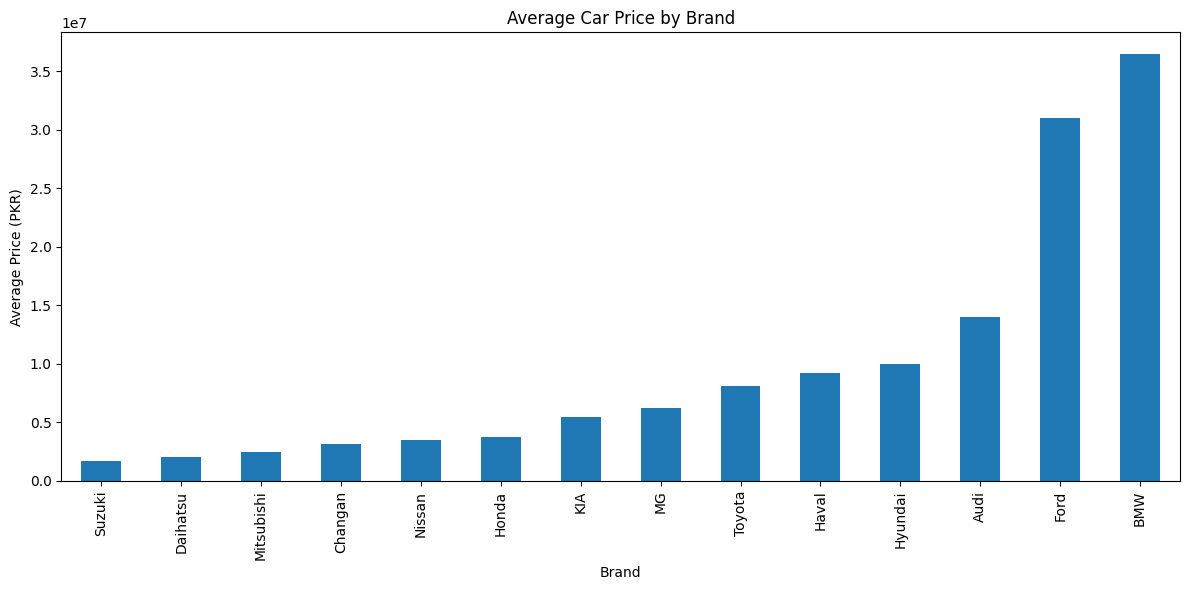

In [43]:
plt.figure(figsize=(12,6))
df.groupby("brand")["price"].mean().sort_values().plot(kind="bar")
plt.title("Average Car Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price (PKR)")
plt.tight_layout()
plt.show()


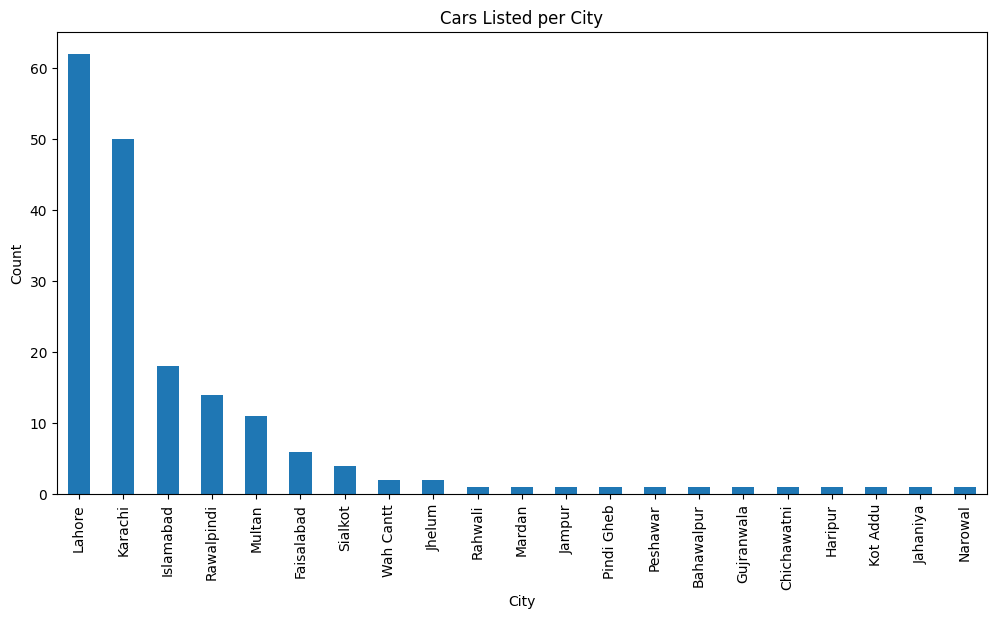

In [44]:
plt.figure(figsize=(12,6))
df["city"].value_counts().plot(kind="bar")
plt.title("Cars Listed per City")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()


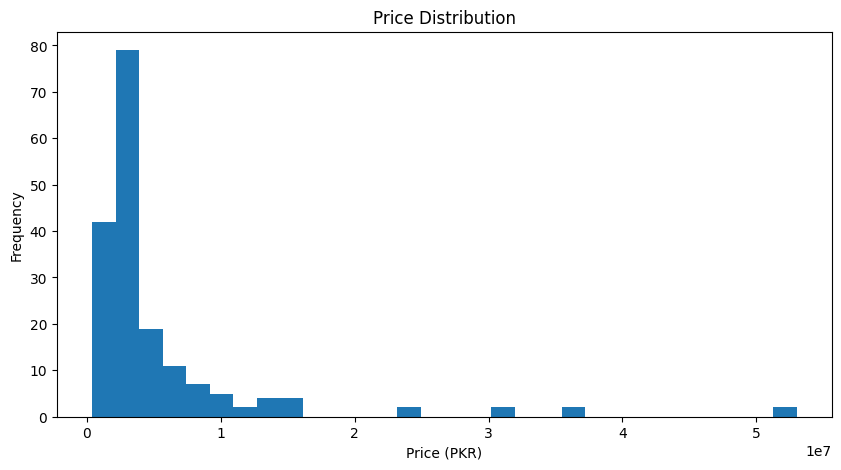

In [45]:
plt.figure(figsize=(10,5))
plt.hist(df["price"].dropna(), bins=30)
plt.title("Price Distribution")
plt.xlabel("Price (PKR)")
plt.ylabel("Frequency")
plt.show()


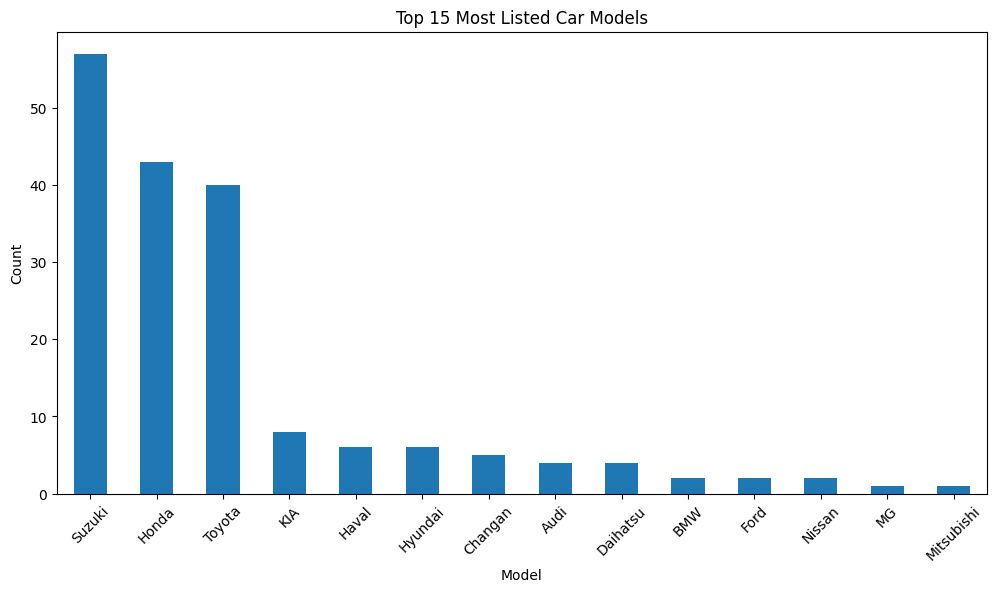

In [47]:
plt.figure(figsize=(12,6))
df["model"].value_counts().head(15).plot(kind="bar")
plt.title("Top 15 Most Listed Car Models")
plt.xlabel("Model")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


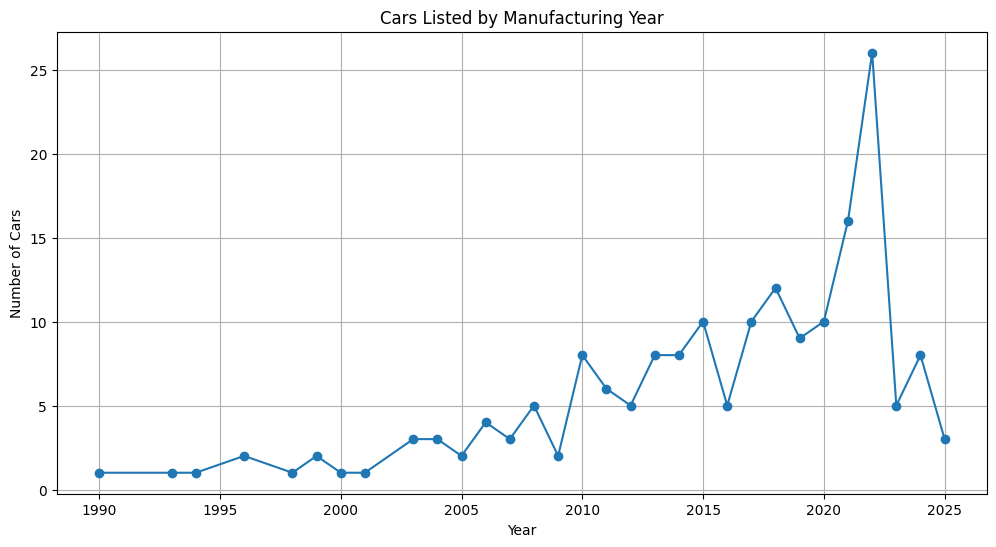

In [48]:
plt.figure(figsize=(12,6))
df["year"].value_counts().sort_index().plot(kind="line", marker='o')
plt.title("Cars Listed by Manufacturing Year")
plt.xlabel("Year")
plt.ylabel("Number of Cars")
plt.grid(True)
plt.show()


## Now build connection between  python and mysq

In [50]:
!pip install pandas pyodbc



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import pyodbc
import pandas as pd

# --- Connect to MySQL ---
conn = pyodbc.connect(
    'DRIVER={MySQL ODBC 9.5 ANSI Driver};'
    'SERVER=localhost;'
    'DATABASE=pakwheels_db;'  # tumhara database name
    'USER=root;'
    'PASSWORD=za07@$=224488;'   # apna password
    'charset=utf8;'
)

cursor = conn.cursor()
print("✅ Connected to database:", cursor.execute("SELECT DATABASE();").fetchone()[0])


✅ Connected to database: pakwheels_db


In [53]:
create_table_query = """
CREATE TABLE IF NOT EXISTS used_cars (
    id INT AUTO_INCREMENT PRIMARY KEY,
    title VARCHAR(255),
    model VARCHAR(255),
    year INT,
    price BIGINT,
    city VARCHAR(100)
);
"""
cursor.execute(create_table_query)
conn.commit()
print("✅ Table ready!")


✅ Table ready!


In [56]:
df = pd.read_csv("pakwheels_used_cars.csv")

# Optional: Clean / format columns
df['brand'] = df['title'].str.split().str[0]
df['price'] = df['price'].astype(str).str.replace(",", "").str.extract(r"(\d+)").astype(float)
df['year'] = df['year'].astype(str).str.extract(r"(\d{4})").astype(float)
df['city'] = df['city'].astype(str).str.strip().str.title()


In [61]:
insert_query = """
INSERT INTO used_cars (title, model, year, price, city)
VALUES (?, ?, ?, ?, ?)
"""

for index, row in df.iterrows():
    cursor.execute(insert_query,
                   row['title'],
                   row['model'],
                   int(row['year']) if not pd.isna(row['year']) else None,
                   int(row['price']) if not pd.isna(row['price']) else None,
                   row['city']
                  )

conn.commit()
print(f"✅ {len(df)} rows inserted successfully!")


✅ 181 rows inserted successfully!


In [62]:
cursor.execute("SELECT COUNT(*) FROM used_cars;")
total_rows = cursor.fetchone()[0]
print(f"🔹 Total rows in table: {total_rows}")

cursor.execute("SELECT * FROM used_cars LIMIT 5;")
for row in cursor.fetchall():
    print(row)

cursor.close()
conn.close()
print("✅ MySQL connection closed!")


🔹 Total rows in table: 181
(1, 'Toyota Prius 2013 for sale in Karachi', 'Toyota', 2013, 3900000, 'Karachi')
(2, 'Suzuki Mehran 2015 for sale in Rawalpindi', 'Suzuki', 2015, 1290000, 'Rawalpindi')
(3, 'Toyota Hilux 2021 for sale in Multan', 'Toyota', 2021, 11900000, 'Multan')
(4, 'KIA Sorento 2022 for sale in Karachi', 'KIA', 2022, 8700000, 'Karachi')
(5, 'Honda Civic 2008 for sale in Lahore', 'Honda', 2008, 2485000, 'Lahore')
✅ MySQL connection closed!
